APM 598 Homework 2 - 3rd March 2023

Siddharth Jain 1226137070

Ketan Choudhary 1226082301

Pranav Chougule 1225934595

Q 1A

In [1]:
import tensorflow.keras as keras
import numpy as np
import gc
print("Q 1A")
#to clear previous TF cached graph
gc.collect()

x = np.array([[1,0], [-1,0], [0,1], [0,-1]]) #X1, X2, X3, X4
y = np.array([[1,0], [1,0], [0,1], [0,1]])   #S1, S1, S2, S2

#model
model = keras.Sequential([
    keras.layers.Dense(2, input_shape=(2,), activation='relu', kernel_initializer='glorot_uniform'),
    keras.layers.Dense(2, activation=None, kernel_initializer='glorot_uniform')
])

#training the model
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='mean_absolute_error', optimizer=optimizer, metrics=None)
model.fit(x, y, epochs=10000, verbose=0)

#Get Weights and biases of layer 1
weights_1, biases_1 = model.layers[0].get_weights()

#Get Weights and biases of layer 2
weights_2, biases_2 = model.layers[1].get_weights()

print("\nWeights for layer1:\n",weights_1)
print("Biases  for layer1:\n",biases_1,"\n")
print("Weights for layer2:\n",weights_2)
print("Biases  for layer2:\n",biases_2,"\n")

print("Score[s1, s2] for X1 [ 1,0]: ",model.predict(np.array([x[0]])),"\n")
print("Score[s1, s2] for X2 [-1,0]: ",model.predict(np.array([x[1]])),"\n")
print("Score[s1, s2] for X3 [ 0,1]: ",model.predict(np.array([x[2]])),"\n")
print("Score[s1, s2] for X4 [ 0,-1]: ",model.predict(np.array([x[3]])),"\n")

del model
gc.collect()

Q 1A
training...

Weights for layer1:
 [[ 1.1349535  -0.2115434 ]
 [ 0.33902076  0.9033544 ]]
Biases  for layer1:
 [-0.31839803 -0.21323949] 

Weights for layer2:
 [[ 0.58303607 -0.67433393]
 [-0.77666426  0.6701857 ]]
Biases  for layer2:
 [0.52405316 0.55094624] 

1/1 [==============================] - 0s 93ms/step
Score[s1, s2] for X1 [ 1,0]:  [[1.0001345e+00 3.1512976e-04]] 

1/1 [==============================] - 0s 25ms/step
Score[s1, s2] for X2 [-1,0]:  [[0.52405316 0.55094624]] 

1/1 [==============================] - 0s 24ms/step
Score[s1, s2] for X3 [ 0,1]:  [[8.9347363e-05 9.9954474e-01]] 

1/1 [==============================] - 0s 23ms/step
Score[s1, s2] for X4 [ 0,-1]:  [[0.52405316 0.55094624]] 



4640

Q 1B

2/2 [==============================] - 0s 1ms/step


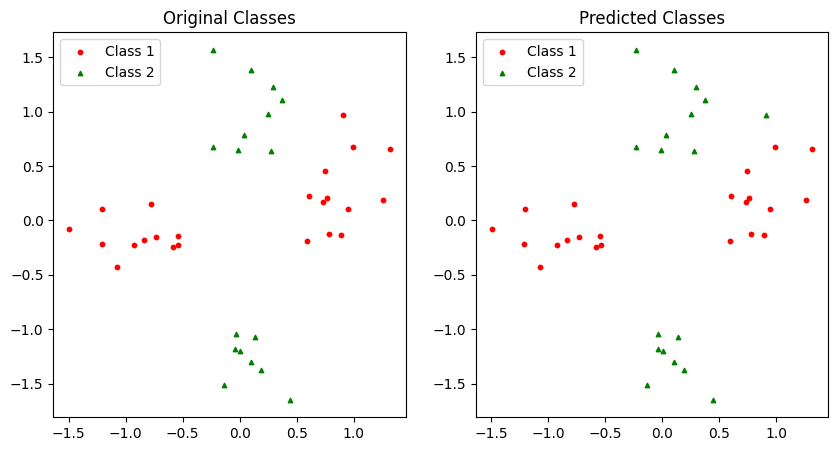

1567

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import gc
print("Q 1B")
# Load and shuffle dataset
df = pd.read_csv('C:\\Users\\siddh\\Documents\\Siddharth\\Classes\\Spring 2023\\APM 598 Introduction to Deep Neural Networks\\HW\\HW 2\\data_HW2_ex1.csv').sample(frac=1).reset_index(drop=True)

# Split into features and classes
x = np.column_stack((df['x1'].values,df['x2'].values))
y = df['class'].values

# Split into training and testing sets
split_ratio = 0.8
split_index = int(split_ratio * len(x))
x_train, x_test = x[:split_index], x[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Define the model architecture
model = Sequential([
    Dense(4, activation='relu', input_shape=(2,)),
    Dense(3, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.05), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary
# Train the model
history = model.fit(x_train, y_train, epochs=1000, verbose=0)

# Evaluate the model on the test set
score, accuracy = model.evaluate(x_test, y_test)

# Predict classes for the test set
y_pred = np.argmax(model.predict(x_test), axis=1)

# Create a subplot to display the original classes and the predicted classes
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Plot the original classes
ax[0].scatter(x_test[y_test == 1][:, 0], x_test[y_test == 1][:, 1], s=10, c='r', marker="o", label='Class 1')
ax[0].scatter(x_test[y_test == 2][:, 0], x_test[y_test == 2][:, 1], s=10, c='g', marker="^", label='Class 2')
ax[0].set_title("Original Classes")
ax[0].legend(loc='upper left')

# Plot the predicted classes
ax[1].scatter(x_test[y_pred == 1][:, 0], x_test[y_pred == 1][:, 1], s=10, c='r', marker="o", label='Class 1')
ax[1].scatter(x_test[y_pred == 2][:, 0], x_test[y_pred == 2][:, 1], s=10, c='g', marker="^", label='Class 2')
ax[1].set_title("Predicted Classes")
ax[1].legend(loc='upper left')

plt.show()

# Perform garbage collection to free up memory
gc.collect()

Q 2A and 2B

Q2A and Q2B

Number of points is 3


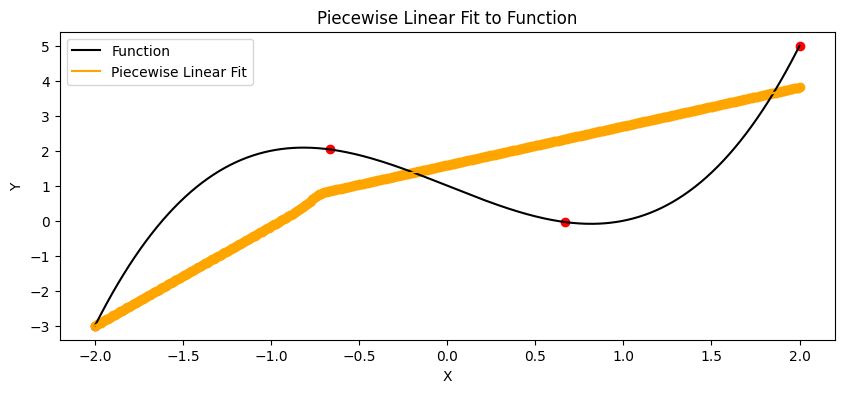

Trained Network:
Number of nodes in hidden layer: 4 (num_points+1)

Number of points is 10


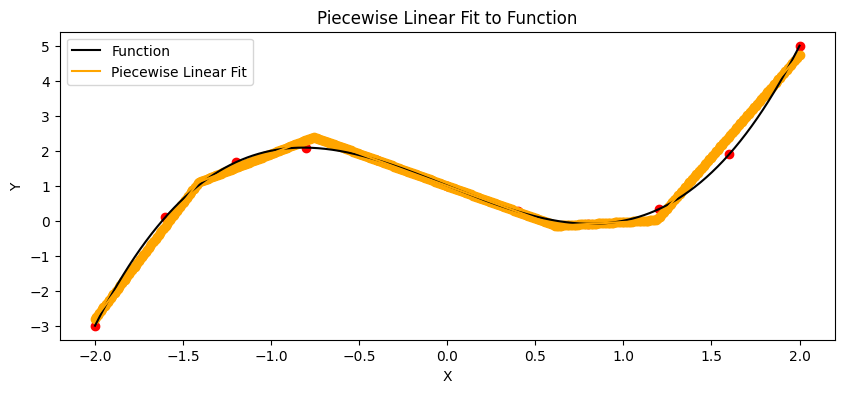

Trained Network:
Number of nodes in hidden layer: 11 (num_points+1)

Number of points is 25


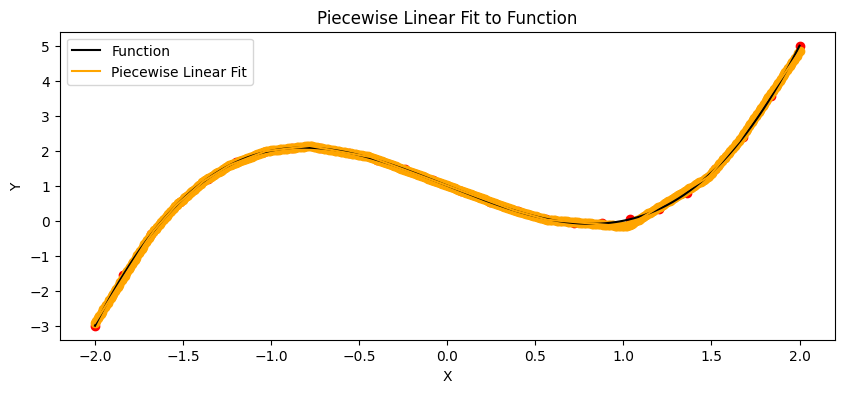

Trained Network:
Number of nodes in hidden layer: 26 (num_points+1)


In [7]:
import torch
from torch.utils.data import DataLoader, TensorDataset
import torch.nn as nn
import torch.optim as optim

import matplotlib.pyplot as plt
import numpy as np
print("Q2A and Q2B")
'''Define any function to be used as input'''
def f(x):
    return x**3 - 2*x + 1

def get_data_points(f, start, end, num_points):
    '''Generate data points'''
    x = torch.linspace(start, end, num_points).reshape(-1, 1)
    y = f(x)
    return x, y

def get_plotting_points(f, start, end, num_points):
    '''Generate points for plotting the function'''
    x = torch.linspace(start, end, num_points).reshape(-1, 1)
    y = f(x)
    return x, y

class Net(nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = nn.Linear(n_feature, n_hidden)
        self.predict = nn.Linear(n_hidden, n_output)
  
    def forward(self, x):
        x = nn.functional.relu(self.hidden(x)) # ReLU activation
        x = self.predict(x)
        return x

def train_model(model, optimizer, criterion, dataloader, num_epochs):
    '''Train the neural network model'''
    losses = []
    for epoch in range(num_epochs):
        epoch_loss = 0
        for x, y in dataloader:
            optimizer.zero_grad()
            y_pred = model(x)
            loss = criterion(y_pred, y)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()
        losses.append(epoch_loss)
    return model, losses

def piecewise_linear(f, start, end, num_points):
    '''Fit a piecewise linear function to the input function'''
    x, y = get_data_points(f, start, end, num_points+1)
    dataset = TensorDataset(x, y)
    dataloader = DataLoader(dataset, batch_size=32, shuffle=True)
    model = Net(n_feature=1, n_hidden=num_points+1, n_output=1)
    #print(model)
    optimizer = optim.Adam(model.parameters(), lr=0.01)
    criterion = nn.MSELoss()
    trained_model, losses = train_model(model, optimizer, criterion, dataloader, num_epochs=500)
    p_x, p_y = get_plotting_points(f, start, end, 500)
    y_pred = trained_model(p_x)
    #print("\nThe predicted values for the given X: ", y_pred.data.numpy())
    plt.figure(figsize=(10,4))
    plt.plot(p_x.data.numpy(), p_y.data.numpy(), color="black", label='Function')
    plt.scatter(x.data.numpy(), y.data.numpy(), color="red")
    plt.scatter(p_x.data.numpy(), y_pred.data.numpy(), color="orange")
    plt.plot(p_x.data.numpy(), y_pred.data.numpy(), color="orange", label='Piecewise Linear Fit')
    plt.title('Piecewise Linear Fit to Function')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.show()
    print("Trained Network:\nNumber of nodes in hidden layer: {} (num_points+1)".format(num_points+1))
    for name, param in trained_model.named_parameters(): 
        if param.requires_grad: 
            print(name, param.data)
    return trained_model, losses

def main():
    print()
    print("Number of points is 3")
    piecewise_linear(f, start=-2, end=2, num_points=3)
    print()
    print("Number of points is 10")
    piecewise_linear(f, start=-2, end=2, num_points=10)
    print()
    print("Number of points is 25")
    piecewise_linear(f, start=-2, end=2, num_points=25)

if __name__ == '__main__':
    main()


Piecewise Interpolation

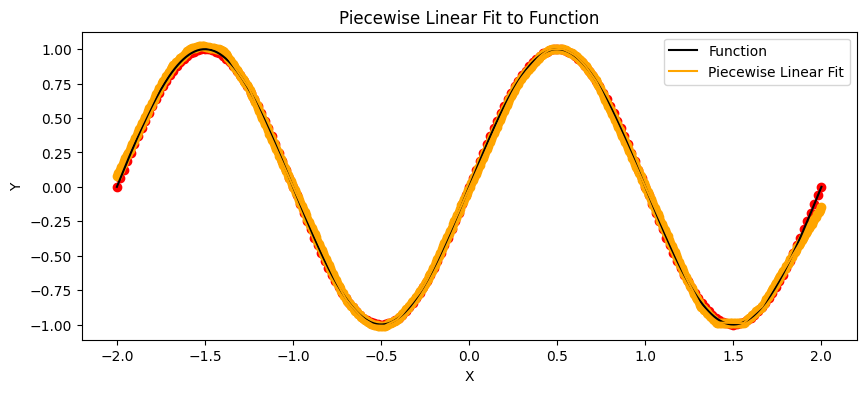

Trained Network:
Number of nodes in hidden layer: 201 (num_points+1)


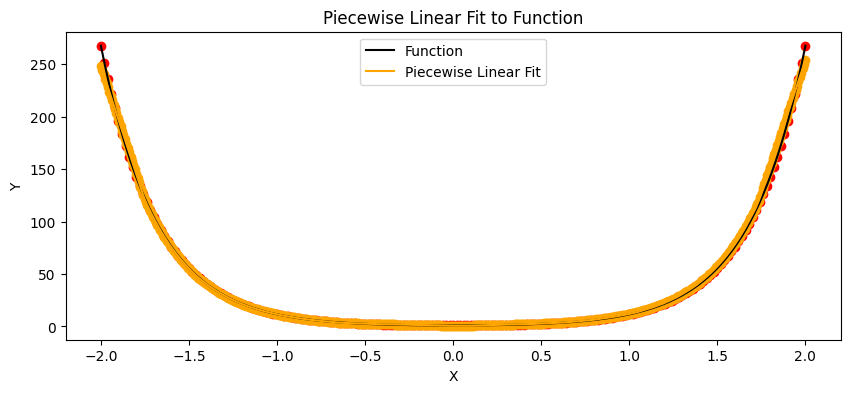

Trained Network:
Number of nodes in hidden layer: 201 (num_points+1)


(Net(
   (hidden): Linear(in_features=1, out_features=201, bias=True)
   (predict): Linear(in_features=201, out_features=1, bias=True)
 ),
 [52412.615234375,
  38201.44580078125,
  31657.050048828125,
  26113.421173095703,
  23107.95635986328,
  20407.545349121094,
  19349.7880859375,
  17771.69970703125,
  17346.744873046875,
  18767.488159179688,
  18224.081481933594,
  15466.125122070312,
  14298.059020996094,
  13600.903533935547,
  14060.646484375,
  13176.638061523438,
  14515.80712890625,
  13931.132202148438,
  12139.410766601562,
  11821.526611328125,
  11275.817321777344,
  12576.521057128906,
  11063.602966308594,
  11800.397705078125,
  10529.470642089844,
  9835.77880859375,
  9967.299713134766,
  9200.73046875,
  9048.344604492188,
  8853.326049804688,
  9144.909118652344,
  9941.675109863281,
  8044.766540527344,
  8000.735046386719,
  9321.124633789062,
  8064.631591796875,
  8404.918640136719,
  7343.852111816406,
  7944.8326416015625,
  8363.2607421875,
  7148.2403564

In [15]:
gx = lambda x: np.sin(np.pi * x)
piecewise_linear(gx, start=-2, end=2, num_points=200)

gx = lambda x: np.cosh(np.pi * x)
piecewise_linear(gx, start=-2, end=2, num_points=200)

Q3

Epoch 1/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6882 - accuracy: 0.7565 - val_loss: 0.5080 - val_accuracy: 0.8191
Epoch 2/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5196 - accuracy: 0.8166 - val_loss: 0.4747 - val_accuracy: 0.8344
Epoch 3/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4992 - accuracy: 0.8254 - val_loss: 0.4588 - val_accuracy: 0.8374
Epoch 4/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4849 - accuracy: 0.8271 - val_loss: 0.4595 - val_accuracy: 0.8420
Epoch 5/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4755 - accuracy: 0.8324 - val_loss: 0.4428 - val_accuracy: 0.8481
Epoch 6/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4684 - accuracy: 0.8336 - val_loss: 0.4457 - val_accuracy: 0.8460
Epoch 7/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4672 - accuracy: 0.8343 - val_loss: 0.4420 - val_ac

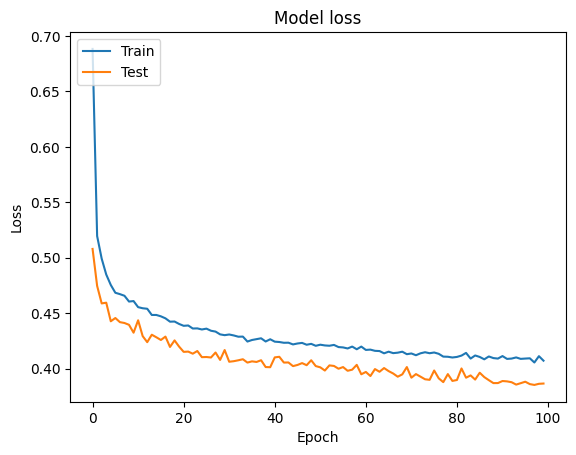

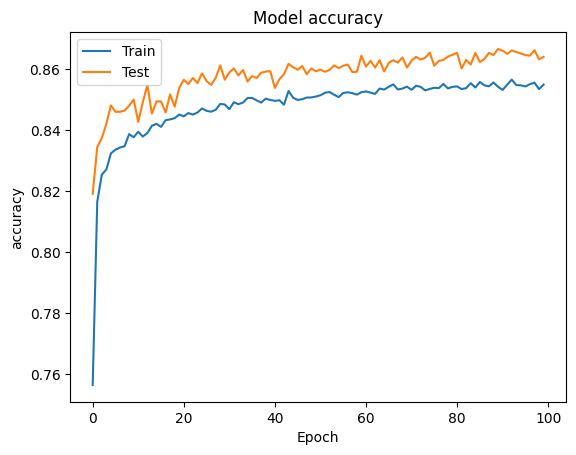

Train accuracy: 0.8761833310127258
Test accuracy: 0.8640000224113464


In [30]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout
from tensorflow.keras import regularizers

# Load Fashion-MNIST data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Normalize pixel values to be between 0 and 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape data to be suitable for convolutional layers
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Define model architecture with L2 regularization
'''
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001), input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
'''

model = Sequential()
model.add(Conv2D(4, (2, 2), activation='relu', kernel_regularizer=regularizers.l2(0.001), input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(2, (2, 2), activation='relu', kernel_regularizer=regularizers.l2(0.001)))
#model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dropout(0.2))
#model.add(Conv2D(10, (2, 2), activation='softmax'))
model.add(Dense(10, activation='softmax'))

# Compile model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train model
history = model.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test))

# Evaluate model on test set
test_loss, test_acc = model.evaluate(x_test, y_test)
train_loss, train_acc = model.evaluate(x_train, y_train)

print('    loss     (train, test): {:.4f},  {:.4f}'.format(train_loss, test_loss))
print('    accuracy (train, test): {:.4f},  {:.4f}'.format(train_acc, test_acc)) 

import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

#print('Training accuracy:', history.history['accuracy'][-1])
print('Train accuracy:', train_acc)
print('Test accuracy:', test_acc)
